In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
data = pd.read_table("m_logret_10stocks.txt")

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.dropna()

### Part (a) 

In [4]:
mean = data.mean()
mean

AAPL    0.006894
ADBE    0.007686
ADP     0.003922
AMD     0.002309
DELL    0.011894
GTW    -0.002486
HP      0.005012
IBM     0.005677
MSFT    0.007293
ORCL    0.006934
dtype: float64

In [5]:
covariance = data.cov()
covariance

,AAPL,ADBE,ADP,AMD,DELL,GTW,HP,IBM,MSFT,ORCL
AAPL,0.004549,0.001328,0.000129,0.002612,0.001928,0.002242,0.000730,0.000950,0.000899,0.001341
ADBE,0.001328,0.004454,0.000516,0.001755,0.001145,0.001939,0.000694,0.000447,0.000610,0.001176
ADP,0.000129,0.000516,0.000788,0.000501,0.000377,0.000577,0.000295,0.000415,0.000324,0.000381
AMD,0.002612,0.001755,0.000501,0.007144,0.001996,0.003081,0.000902,0.001580,0.001186,0.001540
DELL,0.001928,0.001145,0.000377,0.001996,0.003522,0.002546,0.000546,0.001075,0.001605,0.001194
GTW,0.002242,0.001939,0.000577,0.003081,0.002546,0.006506,0.000467,0.001024,0.001441,0.001110
HP,0.000730,0.000694,0.000295,0.000902,0.000546,0.000467,0.002305,0.000483,0.000089,0.000308
IBM,0.000950,0.000447,0.000415,0.001580,0.001075,0.001024,0.000483,0.001483,0.000901,0.000835
MSFT,0.000899,0.000610,0.000324,0.001186,0.001605,0.001441,0.000089,0.000901,0.002019,0.000918
ORCL,0.001341,0.001176,0.000381,0.001540,0.001194,0.001110,0.000308,0.000835,0.000918,0.003853


### Part (b)

In [6]:
def calc_w_eff(mu, sigma, mustar):
    """
    calculates the effecient weights for any given mean, covariance
    matrix and required return mustar
    """
    ones = np.ones((mu.shape[0],))
    ones_t = ones.T
    sigmainv = inv(sigma)
    sigmainv_ones = sigmainv.dot(ones)
    sigmainv_mu = sigmainv.dot(mu)
    
    A = ones_t.dot(sigmainv_mu)
    B = (mu.T).dot(sigmainv_mu)
    C = ones_t.dot(sigmainv_ones)
    D = B*C - A*A
    
    middle_term = np.multiply(sigmainv_mu, C) - np.multiply(sigmainv_ones, A)
    wd = np.multiply(sigmainv_ones, B) - np.multiply(sigmainv_mu, A) + np.multiply(middle_term, mustar)
    w_eff = np.multiply(wd, 1/D)
    var_eff = (B - 2*mustar*A + mustar*mustar*C)/D
    
    return w_eff, math.sqrt(var_eff)

In [7]:
# calculating efficient portfolio weights

mu = mean.to_numpy()
sigma = covariance.to_numpy()
w_eff, stddev_eff = calc_w_eff(mu,sigma,0.003)
w_eff

array([ 0.07136165, -0.02964316,  0.64982619, -0.023669  , -0.19107218,
        0.07856725,  0.16168683,  0.09650606,  0.16306989,  0.02336648])

### Part (d)
Part (c) is done after this

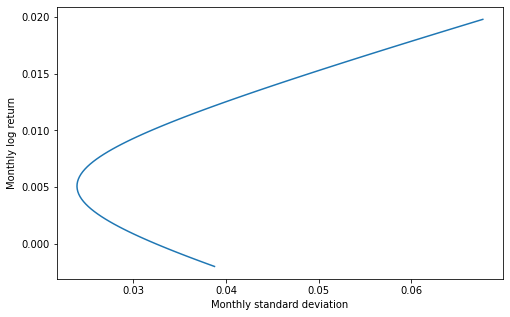

In [8]:
# plotting the Markowitz frontier

mu_list = [-0.002+0.00022*i for i in range(100)]
stddev_list = []
for item in mu_list:
    stddev_list.append(calc_w_eff(mu,sigma,item)[1])
plt.plot(stddev_list, mu_list);
plt.ylabel("Monthly log return");
plt.xlabel("Monthly standard deviation");
fig = plt.gcf()
fig.set_size_inches(8, 5)

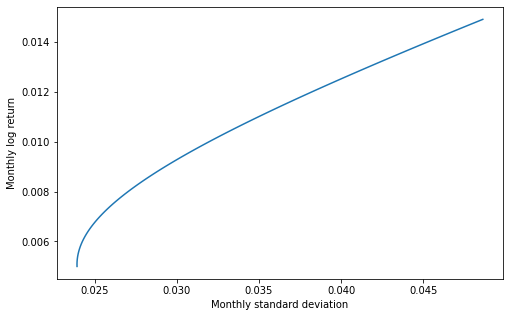

In [9]:
# plotting the efficient frontier

mu_list_eff = [0.005+0.00010*i for i in range(100)]
stddev_list_eff = []
for item in mu_list_eff:
    stddev_list_eff.append(calc_w_eff(mu,sigma,item)[1])
plt.plot(stddev_list_eff, mu_list_eff);
plt.ylabel("Monthly log return");
plt.xlabel("Monthly standard deviation");
fig = plt.gcf()
fig.set_size_inches(8, 5)

### Part (c)

In [10]:
# bootstrap resampling function

def bootstrap(data, b_num, mustar_bs):
    w_eff_bs = []
    for i in range(b_num):
        sample = data.sample(n=data.shape[0], replace=True)
        mu_bs = sample.mean().to_numpy()
        sigma_bs = sample.cov().to_numpy()
        w_eff_bs.append(calc_w_eff(mu_bs, sigma_bs, mustar_bs)[0])
        
    w_eff_bs = sum(w_eff_bs)/b_num
    return w_eff_bs    

In [11]:
mu_list_bs = []
stddev_list_bs = []
w_bar = []
for item in mu_list:
    w_bar = bootstrap(data, 500, item)
    mu_list_bs.append((w_bar.T).dot(mu))
    stddev_list_bs.append(math.sqrt((w_bar.T).dot(sigma).dot(w_bar)))

weights = bootstrap(data, 500, 0.003) # to print weights for mu*=0.003
weights

array([ 0.06488903, -0.01161693,  0.61000949, -0.03163861, -0.11657915,
        0.02674644,  0.16066972,  0.10762548,  0.1709148 ,  0.01897972])

### Part (e)

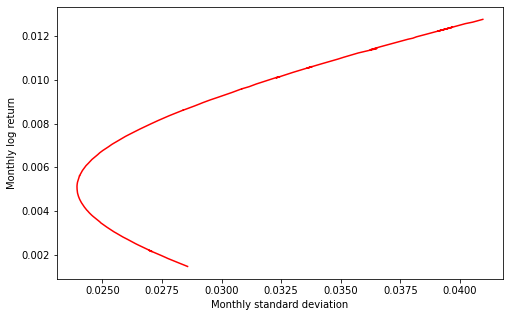

In [12]:
plt.plot(stddev_list_bs, mu_list_bs, 'r');
plt.ylabel("Monthly log return");
plt.xlabel("Monthly standard deviation");
fig = plt.gcf()
fig.set_size_inches(8, 5)

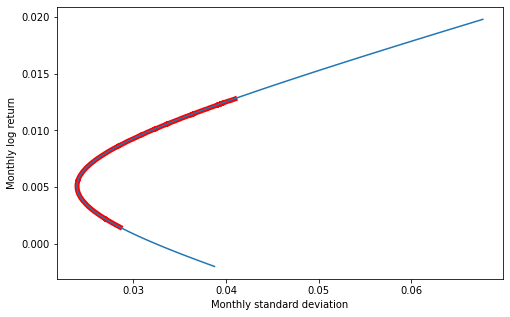

In [13]:
plt.plot(stddev_list_bs, mu_list_bs, 'r', linewidth=5.0);
plt.plot(stddev_list, mu_list);
plt.ylabel("Monthly log return");
plt.xlabel("Monthly standard deviation");
fig = plt.gcf()
fig.set_size_inches(8, 5)

We can see that the bootstrapped plot (thickened for visualization) lies almost exactly on the Markowitz frontier, but it does not span the entire range of $\mu$ values.